## Central Limit Theorem

- How it works: 
    - Sample from a distribution k times; this can be from any kind of distribution, but let's call the distribution **D**
        - Take the mean (expectation) of those samples; now you have an estimate of the underlying distribution's mean
        - Call the set of samples $k_{1}$
        - $E(k_{1})$ = one sample mean of **D**
    - Take a second random sample, again of size k, from the same distribution **D**; compute that sample's mean 
        - Let's call this second sample $k_{2}$
        - $E(k_{2})$ = a second sample mean of **D**
    - Now you have two samples of the underlying distribution's mean (each sample is size k, and both are coming from distribution **D**)
        - We have $E(k_{1})$ and $E(k_{2})$ from **D**
    - Keep taking samples (up to n) of size k from distribution **D**
        - e.g. $E(k_{1})$, $E(k_{2})$, $E(k_{3})$, $E(k_{4})$
        - Call the number of samples n, so we have n = 4 now
    - Now you have n samples, where each sample is made up of k elements, that represent an estimate of distribution **D**'s mean
    - CLT says that the distribution of n will now be approximately normal (and actually normal in the limit, when we take infinite samples)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Example drawing from a uniform distribution

In [2]:
uniform_draws = np.random.uniform(1,10,(10,4))
# draw from a uniform distribution 10 times, and take 4 samples each time

uniform_draws

array([[1.52111269, 5.3105436 , 4.82611355, 4.63872416],
       [4.62510878, 6.75293194, 1.32347527, 7.86913322],
       [7.43834148, 9.07158545, 2.34592552, 8.42780474],
       [1.10821351, 2.50739818, 6.23882439, 5.64853879],
       [6.2953439 , 4.65167542, 9.06243755, 8.185975  ],
       [6.07069971, 2.06267472, 2.91888149, 1.24368513],
       [5.51822497, 4.34021592, 5.49276717, 4.61020584],
       [5.61209646, 7.02238557, 1.67787391, 3.04282397],
       [2.19114421, 5.14097941, 5.78821618, 8.65787567],
       [8.29998963, 6.73996777, 1.87474755, 4.92281326]])

In [3]:
sample_means = np.apply_along_axis(lambda x: np.mean(x),1,uniform_draws)  
# calculate the mean of each sample
# (where a sample is a four-element array)
 
sample_means

array([4.0741235 , 5.1426623 , 6.8209143 , 3.87574372, 7.04885797,
       3.07398526, 4.99035348, 4.33879498, 5.44455387, 5.45937955])

In [4]:
sample_means.mean() # now take the expectation of the 10 means

5.0269368930083775

/Users/larakattan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


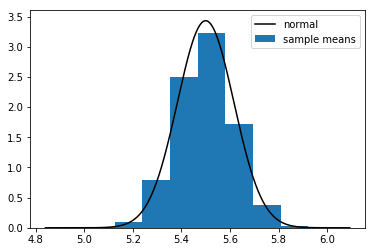

In [5]:
# Now let's run this for many more samples and plot the means
import scipy.stats as stats

uniform_draws = np.random.uniform(1,10,(10**6,500))
sample_means = np.apply_along_axis(lambda x: np.mean(x),1,uniform_draws)  
    
plt.hist(np.sort(sample_means),bins=10,normed=True,label="sample means");

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
y = stats.norm.pdf(x,np.mean(sample_means),np.std(sample_means))
plt.plot(x,y,'k',label="normal");
plt.legend();




## In conclusion

- Note that we originally drew from a **uniform** distribution! 
- Then we took a bunch of samples of size 500 and took the mean of each sample
- The distribution of our sample means looks **normal**! That's the CLT